In [51]:
#Downloads
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_boxplot, scale_size, lims, theme_classic, scale_x_log10, scale_size_continuous, scale_y_log10
import plotnine as p9

In [53]:
#import data

avocado_df =pd.read_csv("avocado-updated-2020.csv")
# avocado_df

The dataset includes information about the pricing, volume, and location of avocado sales. It has helpful information like dates, geographies, avocado types, etc. 

In [54]:

avocado_df["total_US"] = 1*(avocado_df["geography"] == "Total U.S.")
avocado_df["geography"].unique()
avocado_df["region"]= avocado_df["geography"].map({
    "Albany": "Northeast",
    "Atlanta" : "Southeast",
    "Baltimore/Washington" : "Northeast",
    "Boise" : "West",
    "Boston" : "Northern New England",
    "Buffalo/Rochester" : "Northeast",
    "California" : "West",
    "Charlotte" : "Southeaest",
    "Chicago" : "Great Lakes",
    "Cincinnati/Dayton" : "Plains",
    "Columbus" : "Plains",
    "Dallas/Ft. Worth" : "South Central",
    "Denver" : "West",
    "Detroit" : "Great Lakes",
    "Grand Rapids" : "Great Lakes",
    "Great Lakes" : "Great Lakes",
    "Harrisburg/Scranton" : "Northeast",
    "Hartford/Springfield" : "Northern New England",
    "Houston" : "South Central",
    "Indianapolis" : "Midwest",
    "Jacksonville" : "Southeast",
    "Las Vegas" : "West",
    "Los Angeles" : "West",
    "Louisville" : "Midsouth",
    "Miami/Ft. Lauderdale" : "Southeast",
    "Midsouth": "Midsouth",
    "Nashville" : "Midsouth",
    "New Orleans/Mobile" : "Southeast",
    "New York" : "Northeast",
    "Norheast" : "Northeast",
    "Northern New England" : "Northen New England",
    "Orlando" : "Southeast",
    "Philidelphia" : "Northeast",
    "Phoenix/Tucson" : "West",
    "Pittsburgh" : "Northeast",
    "Plains" : "Plains",
    "Portland" : "West" ,
    "Raleigh/Greensboro" : "Southeast",
    "Richmond/Norfolk" : "Southeast",
    "Roanoke" : "Southeast",
    "Sacramento" : "West",
    "San Diego" : "West",
    "San Francisco" : "West",
    "Seattle" : "West",
    "South Carolina": "Southeast",
    "South Central" : "South Central",
    "Southeast" : "Southeast",
    "Spokane" : "West",
    "St. Louis" : "Midsouth" ,
    "Syracuse" : "Northeast",
    "Tampa" : "Southeast",
    "Total U.S." : "Total U.S.",
    "West" : "West",
    "West Tex/New Mexico" : "West Tex/New Mexico"
})
avocado_df["organic"] = 1*(avocado_df["type"] == "organic")
avocado_df = avocado_df.rename(columns= {"4046" : "Small/Medium", "4225": "Large", "4770": "X-Large"})
avocado_clean = avocado_df.drop("type", axis = 1)
# avocado_clean

In [81]:
organic_2017 = avocado_clean[(avocado_clean["organic"] == 1)& (avocado_clean["year"]== 2017)]
organic_2017 = organic_2017[["region", "Small/Medium"]]
organic_2017 =organic_2017.groupby("region")["Small/Medium"].sum()
print(organic_2017.head(1))

region
Great Lakes    244790.26
Name: Small/Medium, dtype: float64
region
Great Lakes    244790.26
Name: Small/Medium, dtype: float64


The Great Lakes Region sold the most Small Organic Avocados in 2017

In [98]:
#Splitting the date variable into day, year and month
avocado_clean["month"] = avocado_clean["date"].map(lambda x: x.split('-')[1])
#the above line of code was created with assistance from chat GPT
avocado_month = avocado_clean.groupby("month")["total_volume"].mean()
avocado_month.sort_values(ascending= False)
#The fifth month of the year saw the highest volume

month
05    1.123632e+06
02    1.095374e+06
06    1.051247e+06
04    1.016582e+06
03    9.957150e+05
01    9.853122e+05
07    9.832681e+05
08    9.499249e+05
09    9.064773e+05
10    8.446863e+05
11    8.223470e+05
12    8.076695e+05
Name: total_volume, dtype: float64

METRO Geographical regions

In [135]:
#create a list of what is included in metro region
avocado_df["geography"].unique()

metro = ["Albany", "Atlanta", "Baltimore/Washington", "Boise", "Boston", "Buffalo/Rochester", "Charlotte", "Chicago", "Cincinnati/Dayton", 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Harrisburg/Scranton','Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville','Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 'New York', 'Orlando', 'Philadelphia', 'Phoenix/Tucson','Pittsburgh', 'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego','San Francisco', 'Seattle', 'South Carolina','Spokane', 'St. Louis', 'Syracuse', 'Tampa' ]
Metro_desc = ((avocado_clean[avocado_clean["geography"].isin(metro)]).groupby("geography")["total_volume"].sum()).sort_values(ascending = False)
Metro_desc.head(1)

geography
Los Angeles    9.593505e+08
Name: total_volume, dtype: float64

Las Angeles sold the highest volume

Creating a box plot of each of the 5 highest volume

In [372]:
#importing plotting packages

from plotnine import ggplot, geom_boxplot, aes, geom_point, theme_classic, labs

#creating plot

# Metro_desc = pd.DataFrame(Metro_desc)
# Metro_desc = Metro_desc.reset_index() 
# Metro_desc.iloc[0:5]
# (ggplot(Metro_desc.iloc[0:5], aes(x = "geography", y = "total_volume")) + geom_boxplot())


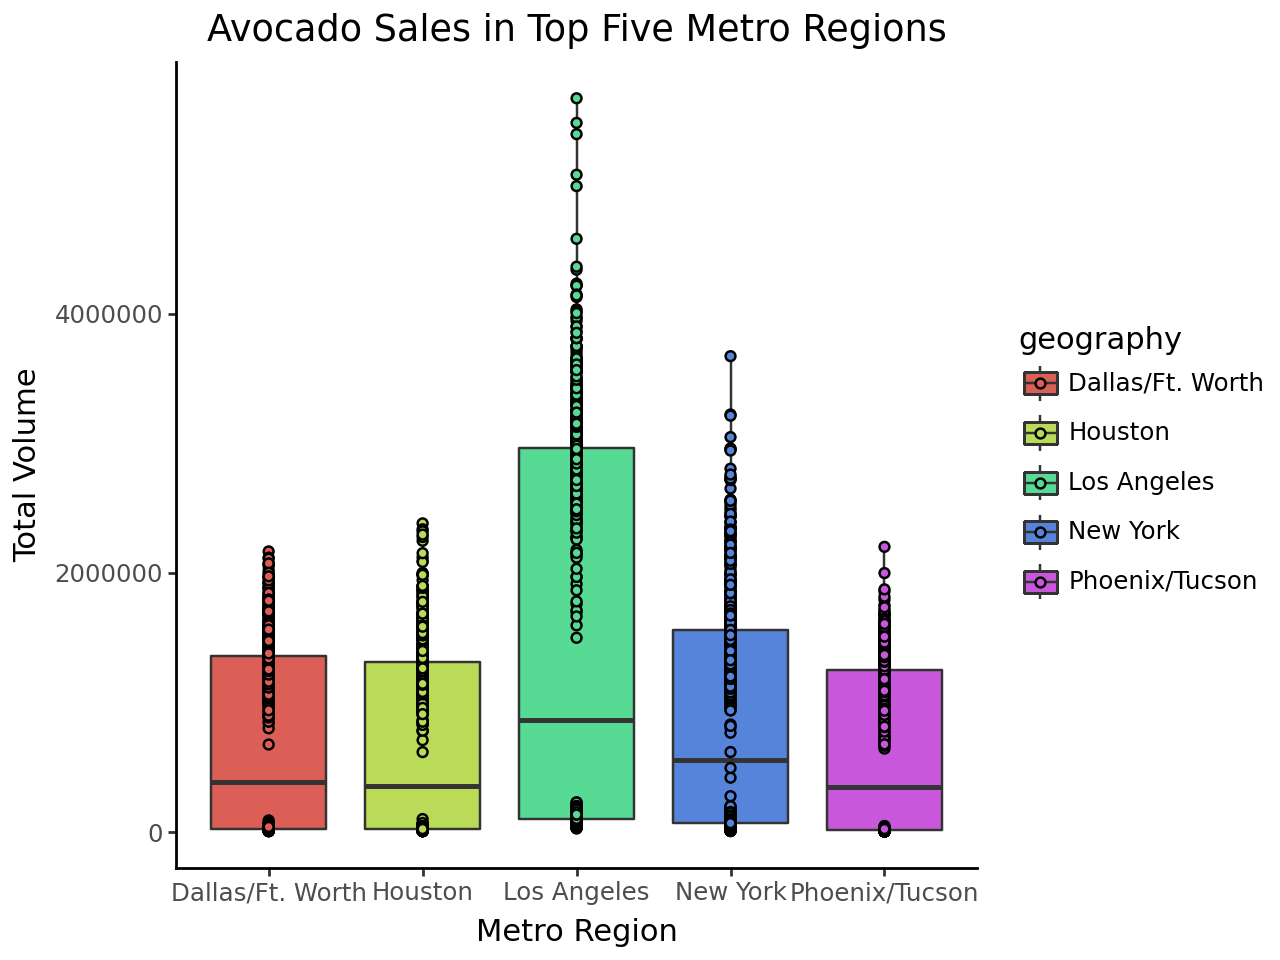

In [158]:
Top_5_cities = Metro_desc.iloc[0:5]

Metro_df = avocado_clean[avocado_clean["geography"].isin(Top_5_cities["geography"])]
Metro_df

(ggplot(Metro_df, aes(x = "geography", y = "total_volume", fill = "geography")) + geom_boxplot() + geom_point() + theme_classic() + labs( x= "Metro Region", y = "Total Volume", title = "Avocado Sales in Top Five Metro Regions"))


In [373]:
#Filtering to California Regions

Cali = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
Cali_df = (avocado_clean[avocado_clean["geography"].isin(Cali)])


In [186]:
#Which Region is the difference in conventional and organic avocodas greatest

#average price of Organic avocodas in each region:
Org_cali_df = Cali_df[Cali_df["organic"] == 1]
Org_price = Org_cali_df.groupby("geography")["average_price"].mean()
Org_price = pd.DataFrame(Org_price)
Org_price = Org_price.reset_index()

#average price of inorganic avocados 
Inorg_cali_df = Cali_df[Cali_df["organic"] == 0]
Inorg_price = Inorg_cali_df.groupby("geography")["average_price"].mean()
Inorg_price = pd.DataFrame(Inorg_price)
Inorg_price = Inorg_price.reset_index()

#Price Difference per region

Cost_diff = Org_price.merge(Inorg_price, on=["geography"], suffixes=("Org", "Inorg"))
Cost_diff["Difference"] = Cost_diff["average_priceOrg"]-Cost_diff["average_priceInorg"]
print(Cost_diff.sort_values(by = "Difference", ascending= False))
#San Franciso has the greatest difference in price between organic and conventional avocados

       geography  average_priceOrg  average_priceInorg  Difference
3  San Francisco          2.119444            1.400490    0.718954
2      San Diego          1.798366            1.113856    0.684510
1     Sacramento          1.873856            1.295359    0.578497
0    Los Angeles          1.574902            1.047124    0.527778
       geography  average_priceOrg  average_priceInorg  Difference
3  San Francisco          2.119444            1.400490    0.718954
2      San Diego          1.798366            1.113856    0.684510
1     Sacramento          1.873856            1.295359    0.578497
0    Los Angeles          1.574902            1.047124    0.527778


In [194]:
from plotnine import geom_text

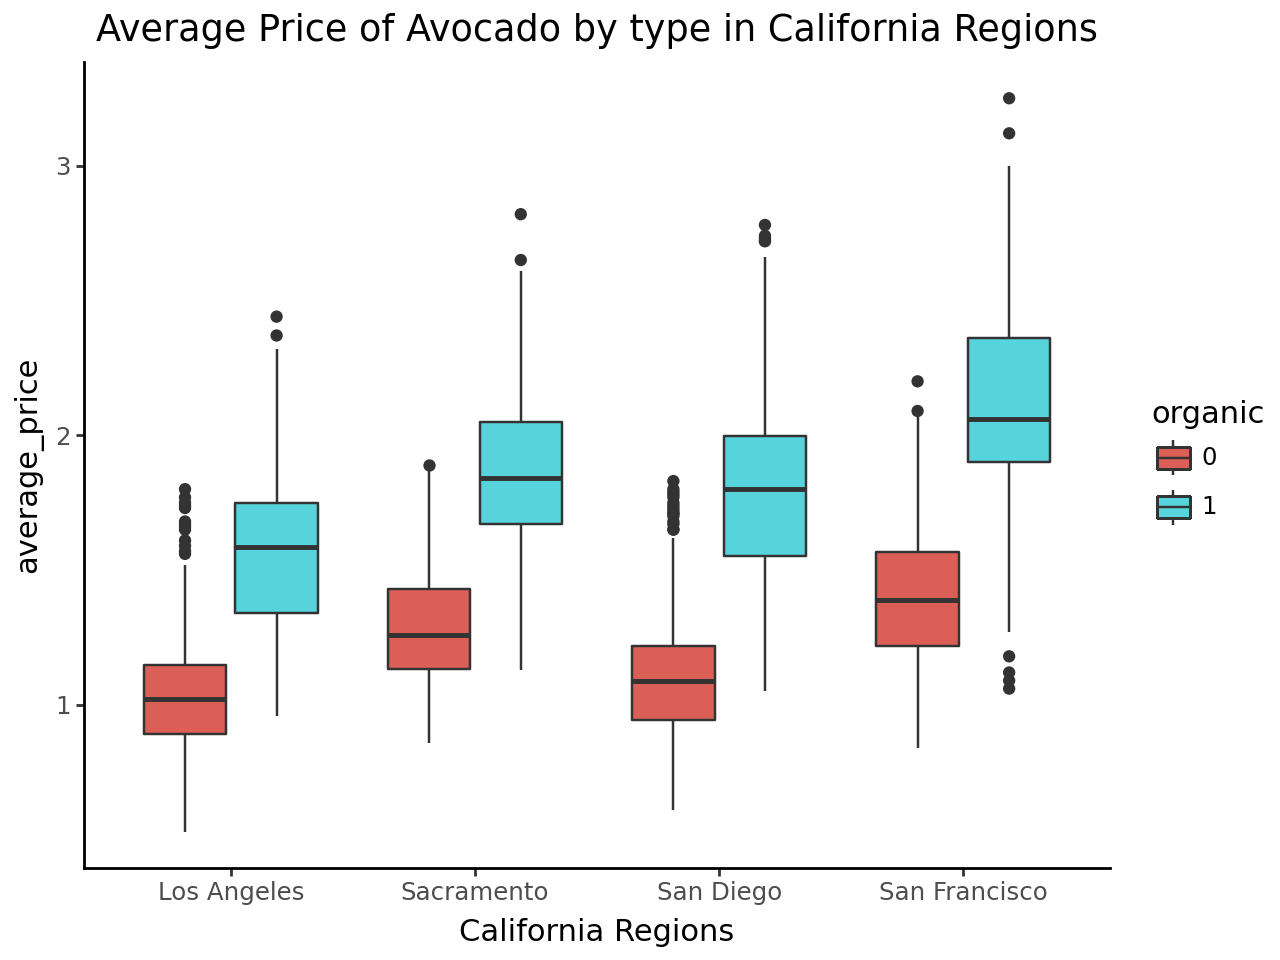

In [209]:
Cali_df["organic"] = Cali_df["organic"].astype(str)
(ggplot(Cali_df, aes( x = "geography", y = "average_price", fill = "organic")) + geom_boxplot() + theme_classic()+ labs( x= "California Regions", y = "average_price", title = "Average Price of Avocado by type in California Regions"))
#Side by side plot of the average price of organic vs. conventional avocados

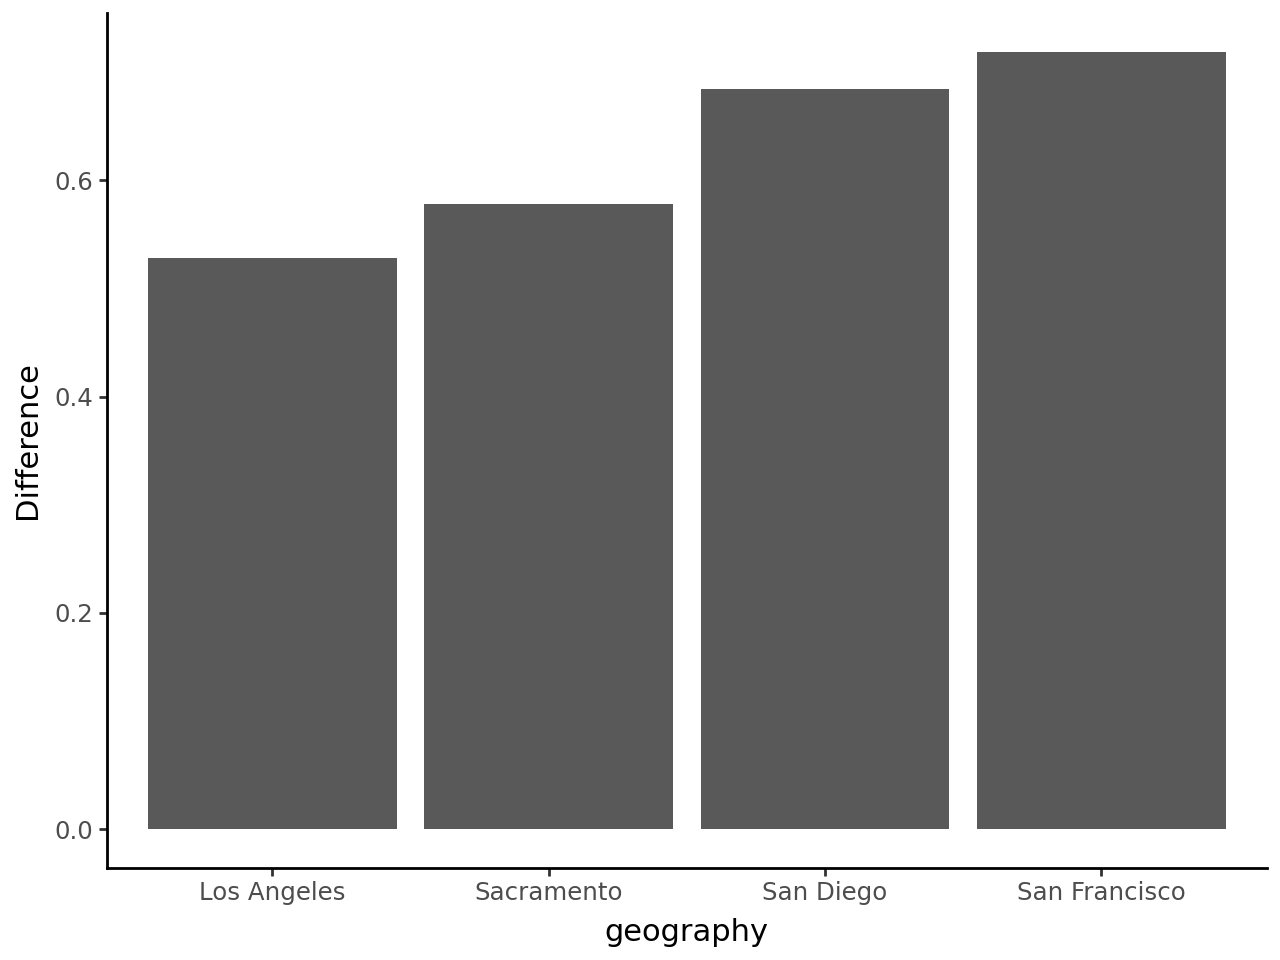

In [213]:
#Barplot of the difference in Organic vs. conventional avocado prices
from plotnine import geom_boxplot
(ggplot(Cost_diff, aes(x = "geography", y = "Difference")) + geom_bar(stat = "identity") +theme_classic())

In [374]:
#porportion of avocados by size and organic vs. conventional

Cali_df["Sum"] = Cali_df["Small/Medium"]+ Cali_df["Large"]+ Cali_df["X-Large"]
Cali_df["Small_pct"] = Cali_df["Small/Medium"]/Cali_df["Sum"]
Cali_df["Large_pct"] = Cali_df["Large"]/Cali_df["Sum"]
Cali_df["X-Large_pct"] = Cali_df["X-Large"]/Cali_df["Sum"]
# Cali_df

long_cali= Cali_df.melt(id_vars= ["geography", "organic"], var_name= "Size", value_name= "amount", value_vars= ["Small/Medium", "Large", "X-Large"])
# long_cali



<positron-console-cell-374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-374>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-374>:6: SettingWithC

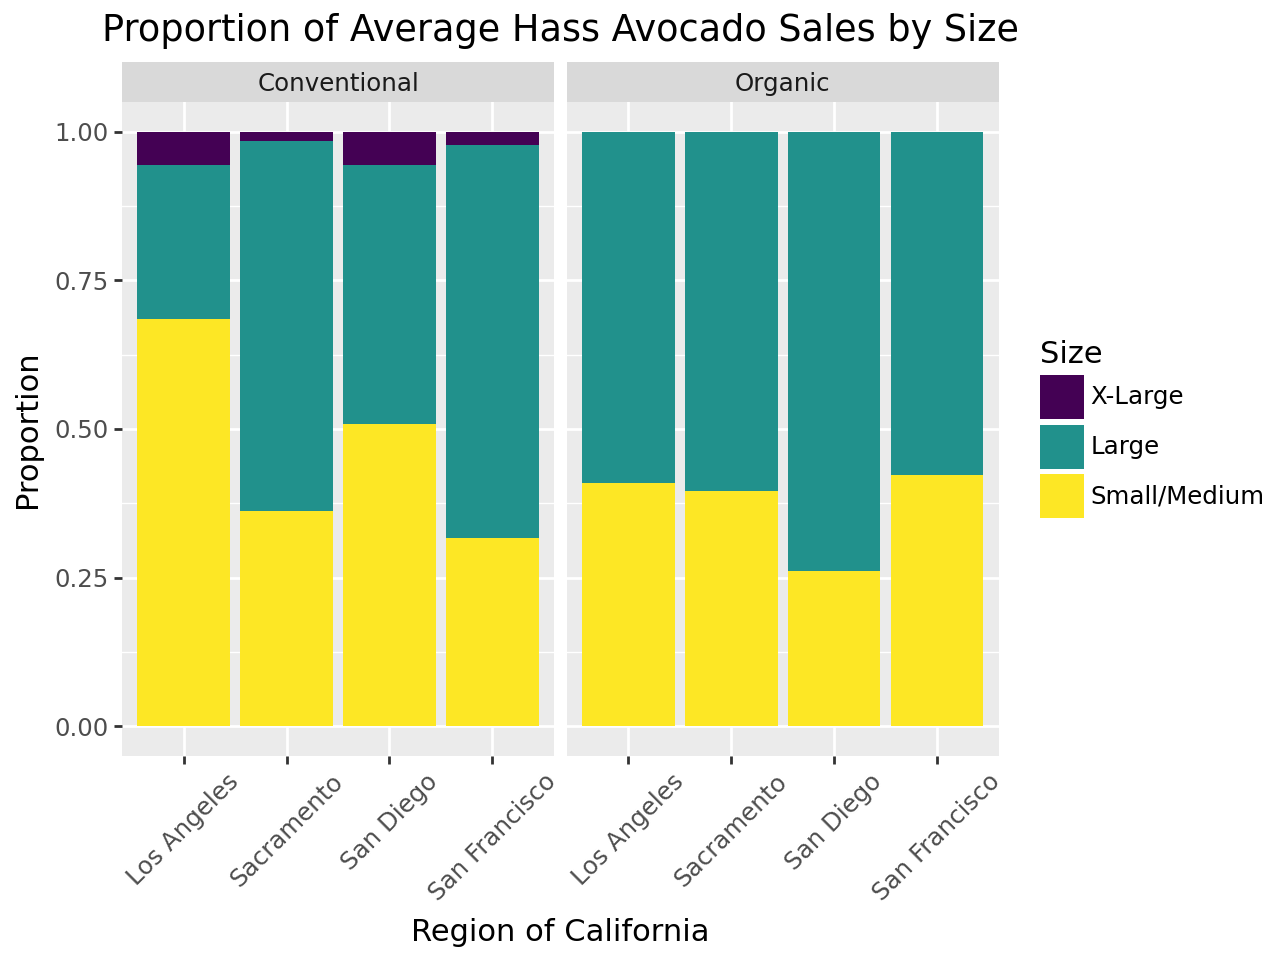

In [272]:
from plotnine import facet_wrap, theme, element_text
long_cali['Size'] = pd.Categorical(long_cali['Size'], categories=['X-Large', 'Large', 'Small/Medium'], ordered=True)
long_cali["Type"]= long_cali["organic"].map({
    "0" : "Conventional",
    "1": "Organic"
})
(ggplot(long_cali, aes(x = "geography", y = "amount", fill = "Size" ))+ geom_bar(stat = "identity",position = "fill") +facet_wrap("Type")+ labs(x = "Region of California", y = "Proportion", title = "Proportion of Average Hass Avocado Sales by Size")+ theme(axis_text_x= element_text(rotation= 45)))
#ChatGPT helped to write the element_text code that angled the X axis labels

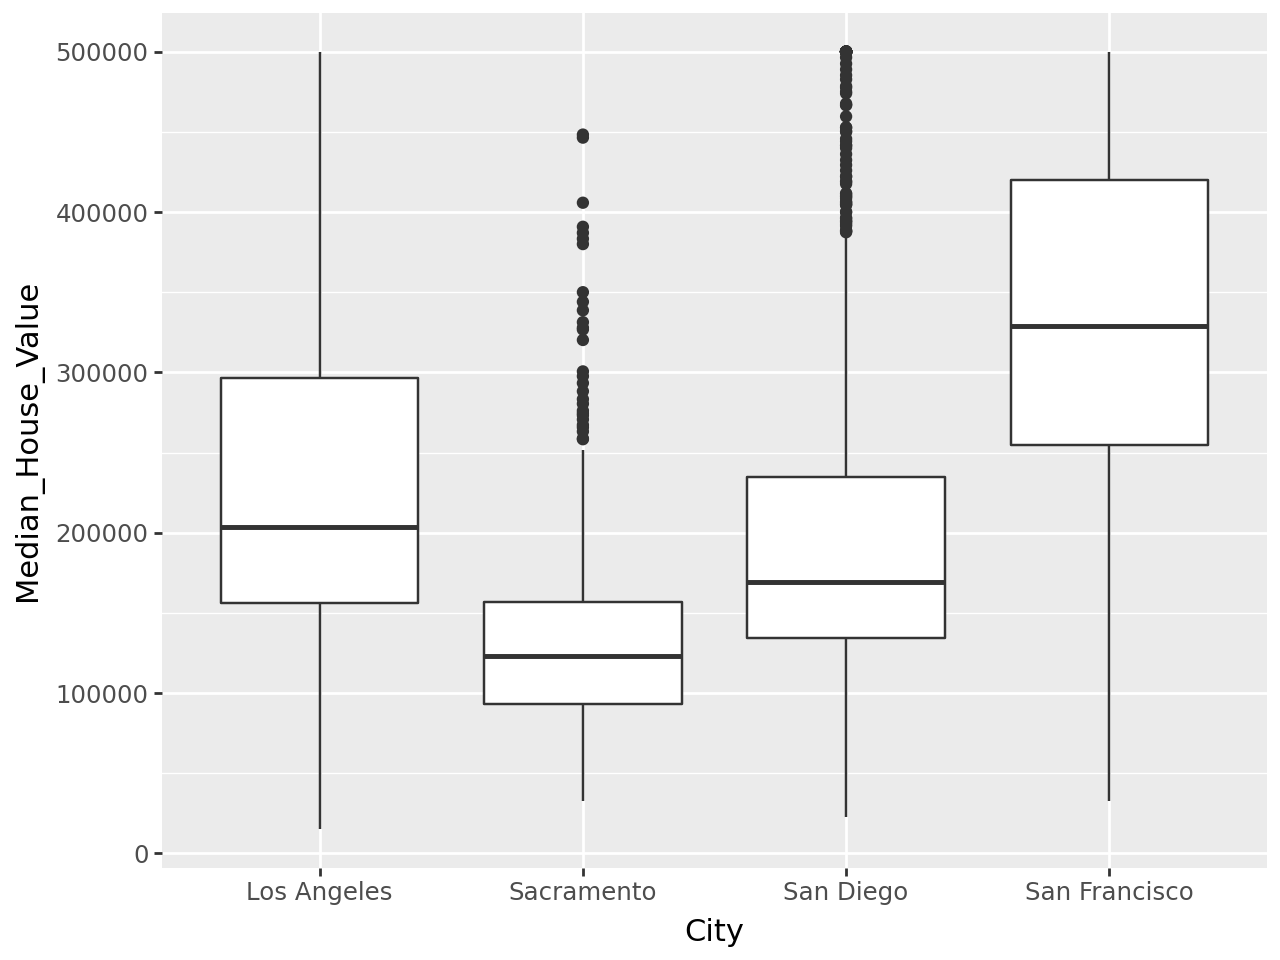

In [284]:
Housing = pd.read_csv("California_Housing_CitiesAdded.csv")
Housing_cities= (Housing[Housing["City"].isin(Cali)])
Housing_cities = Housing_cities[["Median_House_Value", "Median_Income", "Median_Age", "City"]]
(ggplot(Housing_cities, aes(x = "City", y= "Median_House_Value"))+ geom_boxplot())

In [370]:
Cali_df["total_price"] = Cali_df["average_price"]*Cali_df["total_volume"]
# (ggplot(Cali_df, aes(x = "geography", y ="total_price"))+ geom_boxplot())


<positron-console-cell-370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [369]:
# Org_cali_df["total_price"]= Org_cali_df["average_price"]*Org_cali_df["total_volume"]

# Org_total_spent = Org_cali_df.groupby("geography")["total_price"].sum()
# Org_total_spent = pd.DataFrame(Org_total_spent)
# Org_total_spent = Org_total_spent.reset_index()

# (ggplot(Org_total_spent, aes(x = "geography", y = "total_price")) +geom_point())

In [342]:
Cali_city_medians = Cali_df.groupby("geography")["average_price"].median()
Cali_city_medians= pd.DataFrame(Cali_city_medians)
Cali_city_medians = Cali_city_medians.reset_index()
Cali_house_medians = Housing_cities.groupby("City")["Median_House_Value"].median()
Cali_house_medians= pd.DataFrame(Cali_house_medians)
Cali_house_medians = Cali_house_medians.reset_index()
#Merging Dataframes
Cali_house_medians = Cali_house_medians.rename(columns= {"City" : "geography"})
Cali_city_medians = Cali_city_medians.merge(Cali_house_medians, on=  ["geography"])


,geography,average_price,Median_House_Value_x,Median_House_Value_y
0,Los Angeles,1.230,203450.0,203450.0
1,Sacramento,1.595,123200.0,123200.0
2,San Diego,1.410,169150.0,169150.0
3,San Francisco,1.750,329150.0,329150.0


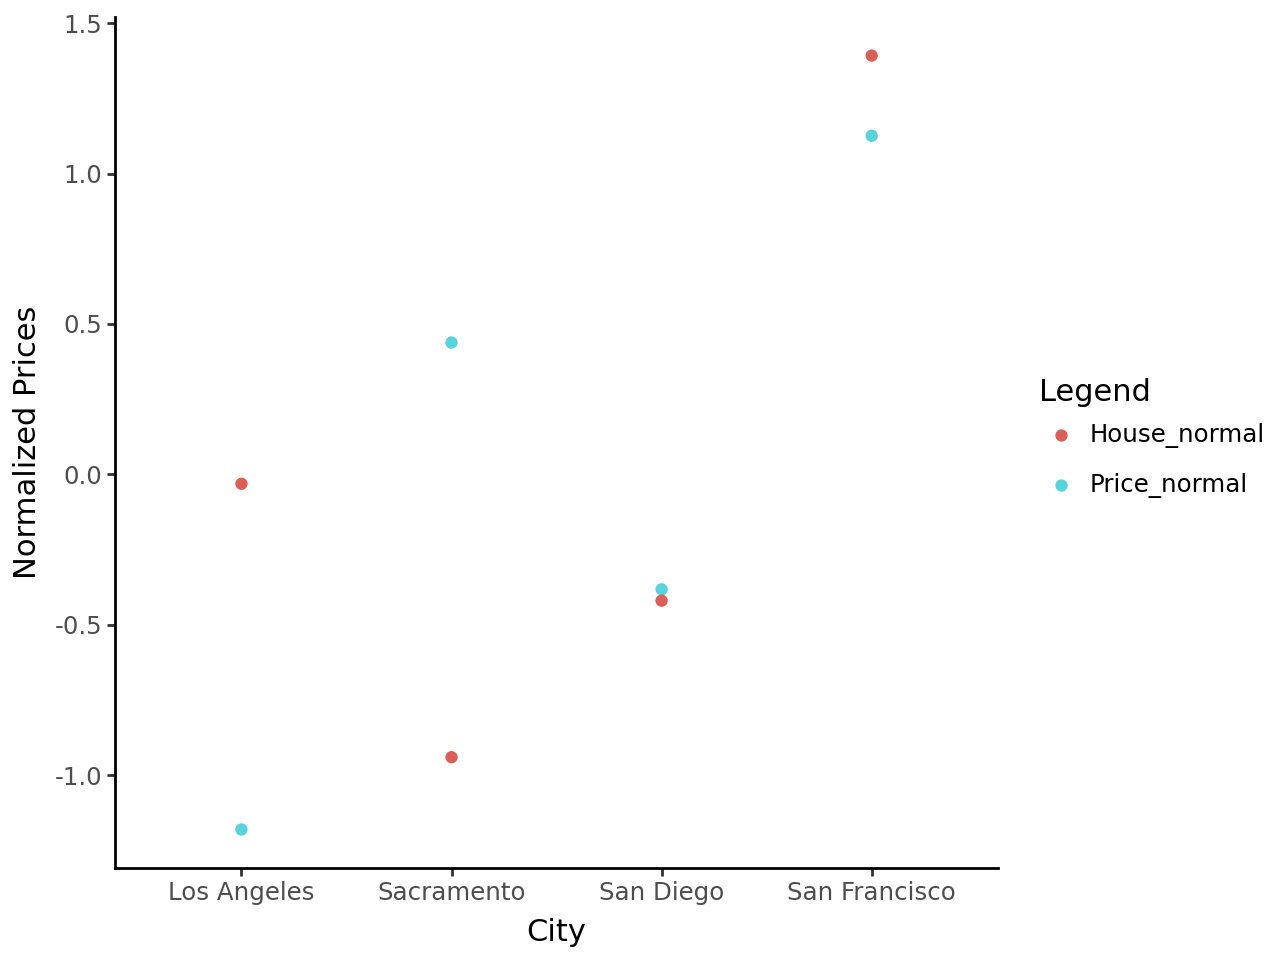

In [368]:
#normalize data
Cali_city_medians["Price_normal"] = (Cali_city_medians["average_price"]- Cali_city_medians["average_price"].mean())/Cali_city_medians["average_price"].std()
Cali_city_medians["House_normal"] = (Cali_city_medians["Median_House_Value_x"]- Cali_city_medians["Median_House_Value_x"].mean())/Cali_city_medians["Median_House_Value_x"].std()
Cali_city_medians_long = Cali_city_medians.melt(id_vars='geography', value_vars=['Price_normal', 'House_normal'], var_name='Price Type', value_name='Normalized Price')
(ggplot(Cali_city_medians_long, aes(x = "geography", y = "Normalized Price",  color = "Price Type")) + geom_point() + labs(x = "City", y = "Normalized Prices", color = "Legend") +theme_classic())


This visualization shows the how both the housing prices and avocado prices in these 4 cities compare to each other. One take away from this graph is that the avocado prices and housing prices trend together, so it may not be that people are spending all their money on avocados, but rather the cost of everything is higher in these areas. 